1. traial align to an event
2. get data between two time points

In [3]:
import tables
import numpy
import matplotlib.pyplot as plt
print("Imports done! ")

Imports done! 


# get the table

In [6]:
#replace this with your hdf filename
fname = 'temp_data/tmpc7h1f4fm.h5'
hdffile = tables.open_file(fname, 'r')
print(hdffile)

temp_data/tmpc7h1f4fm.h5 (File) ''
Last modif.: 'Wed Oct 14 15:08:43 2020'
Object Tree: 
/ (RootGroup) ''
/task (Table(2099,), shuffle, zlib(5)) ''
/task_msgs (Table(51,), shuffle, zlib(5)) ''



In [7]:
task_msgs_tables = hdffile.root.task_msgs
task_tables = hdffile.root.task
print(task_tables.description)

print()
print(task_msgs_tables)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])

/task_msgs (Table(51,), shuffle, zlib(5)) ''


# task msgs data

## look what in the data, eh

In [8]:
print(task_msgs_tables.col)


<bound method Table.col of /task_msgs (Table(51,), shuffle, zlib(5)) ''
  description := {
  "msg": StringCol(itemsize=256, shape=(), dflt=b'', pos=0),
  "time": UInt32Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (252,)>


In [9]:
# look deeper into what is in here, eh
# zip msg and time together
msg_time = list(zip(task_msgs_tables.col('msg'), 
               task_msgs_tables.col('time')))
msg_time[-1]
# returns a list of msg and time in tuples

(b'None', 2099)

this tells us what happens at what time, sort of thing

In [ ]:
#b'a string'.decode('ascii')
#to convert binary string into regular string.

## use xarray to proc the data

# behavioural

## look at some trajectories

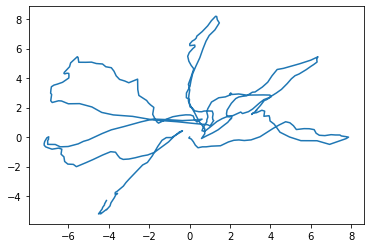

(2099, 3)

In [11]:
#plot out the cursor trajectories
cursor_coor = task_tables.col('cursor')
plt.plot(cursor_coor[:,0], cursor_coor[:,2])
plt.show()

cursor_coor.shape


## we can bundle the behaviour and task data together
the shape and the traject is exactly the same with the trial trajectory, eh

this just shows that I have 6 trials 
and I cannot tell which trial is which, eh. 

## eye tracking (optional)

/eyetracker (EArray(25710, 2), shuffle, zlib(5)) ''


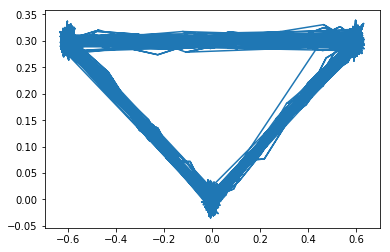

In [13]:
#plot out the eye tracking results
eye_array = hdffile.root.eyetracker
print(eye_array)
plt.plot(eye_array[:,0], eye_array[:,1])

## mocap data

In [ ]:
#plot out the mocap data
mocap_array = hdffile.root.motiontracker



#  neural data

In [12]:
# see what we are dealing with

print(task_tables.description)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])


In [20]:
cursor = np.squeeze(task_tables.col('cursor'))
decoder_state = np.squeeze(task_tables.col('decoder_state'))
internal_decoder_state = np.squeeze(task_tables.col('internal_decoder_state'))

target_state = np.squeeze(task_tables.col('target_state'))
spike_counts = np.squeeze(task_tables.col('spike_counts'))

print(f'decoder_state.shape: {decoder_state.shape}')


decoder_state.shape: (2099, 7)


## before
        sim_C = np.zeros((N_NEURONS, N_STATES))
        # control x positive directions
        sim_C[0, :] = np.array([0, 0, 0, 1, 0, 0, 0])
        sim_C[1, :] = np.array([0, 0, 0, -1, 0, 0, 0])
        # control z positive directions
        sim_C[2, :] = np.array([0, 0, 0, 0, 0, 1, 0])
        sim_C[3, :] = np.array([0, 0, 0, 0, 0, -1, 0])

## change at trial 3, after
    #configure params changes
    sim_C_new = np.zeros((N_NEURONS, N_STATES))
    sim_C_new[0, :] = np.array([0, 0, 0, 0, 1, 0, 0])
    sim_C_new[1, :] = np.array([0, 0, 0, 0, -1, 0, 0])
    # control z positive directions
    sim_C_new[2, :] = np.array([0, 0, 0, 1, 0, 0, 0])
    sim_C_new[3, :] = np.array([0, 0, 0, -1, 0, 0, 0])


they all have the same time vec? Is there a better way to bundle together the input information?

how about letting the monkey chasing a moving target?

harder while the monkey trying to learn the decoder, eh?

internal_decoder_state.shape: (2099, 7)


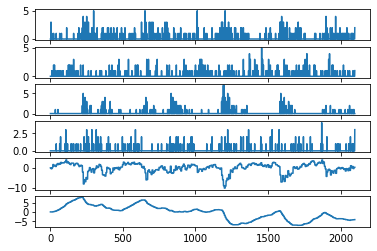

In [28]:
print(f'internal_decoder_state.shape: {internal_decoder_state.shape}')

plt.subplot(6,1,1)
plt.plot(spike_counts[:,0])

plt.subplot(6,1,2)
plt.plot(spike_counts[:,1])

plt.subplot(6,1,3)
plt.plot(spike_counts[:,2])

plt.subplot(6,1,4)
plt.plot(spike_counts[:,3])


plt.subplot(6,1,5)
plt.plot(internal_decoder_state[:,3])

plt.subplot(6,1,6)
plt.plot(cursor[:,0])
#plt.plot(internal_decoder_state[:,3])
#plt.plot(cursor[:,2])